<p align="right"><i>Data Analysis for the Social Sciences - Part II - 2021-11-22</i></p>

# Quantitative Data Analysis

Welcome to Part II of Data Analysis for the Social Sciences. In this stream - Quantitative Data Analysis - we will conduct a range of statistical analyses in order to answer the following research question:

<p><center><i>Is religion associated with differences in sexual attitudes and behaviours among British people?</i></center></p>

### Aims

This lesson - **Bivariate Data Analysis** - has two aims:
1. Demonstrate how to assess whether two variables are associated.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with minimal prior knowledge or experience of quantitative data analysis.
* **Duration**: 45-60 minutes.
* **Pre-requisites**: None.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting bivariate data analysis.
	2. Understand how to select and apply common data analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Introduction to bivariate data analysis*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `In []`.**

To execute a cell, click or double-click the cell and press the `Run` button on the top toolbar (you can also use the keyboard shortcut `Shift + Enter`).

Try it for yourself:

In [2]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and bivariate analysis!"))

Enter name: Diarmuid
[1] "Hi, Diarmuid enjoy learning more about R and bivariate analysis!"


Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [3]:
x * 5

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [4]:
x <- 10 # create an object called 'x' and give it the value '10'

In [5]:
x * 5 # multiply 'x' by 5

[1] 50

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Introduction to bivariate data analysis

In the [**Univariate data analysis** lesson](https://github.com/DiarmuidM/data-analysis-for-the-social-sciences-2021/blob/main/lessons/dass-week-9-univariate-analysis-2021-11-15.ipynb), we learned how to produce statistical summaries of categorical and numeric variables. This is an important step in any quantitative data analysis as it provides a basic understanding of our key variables. However many of the more interesting social science research questions involve **making comparisons**:
* [Is there a difference in the earnings of men and women?](https://doi.org/10.1177%2F0095399716636928)
* [Are children living in the most deprived areas more likely to be obese than those living in the least deprived?](http://dx.doi.org/10.1136/archdischild-2014-307036)
* [Does ethnicity affect trust in the police?](https://doi.org/10.1177%2F1098611104271105) 

Thus in this lesson we will focus on making comparisons using two variables of interest. In particular we will compare the following types of variables:
* **Categorical vs Categorical**
* **Categorical vs Numeric**
* **Numeric vs Numeric**

Although the specific bivariate analysis techniques vary depending on which types of variables we are comparing, there is a common process:
1. Produce a table or graph of the joint distribution of the two variables.
2. Calculate a statistic that summarises key features of the joint distribution.
3. Make a statement about whether the pattern you observe likely to generalise or not (that is, does the pattern only exist in your sample? Or are you likely to find it also in the population from which your sample came?).

We will focus on the first two steps in the process in this lesson. In Week 11 we will address the third step.

### Association

The purpose of making comparisons is to reveal whether there is an association (correlation) between two variables. What do we mean by association? Simply that there is a relationship between two variables (Fogarty, 2019). For example, as the value of one variable increases, do we also observe a similar increase in a second variable?

The relationship may be non-existent, weak, moderate or strong. It may be positive (both variables increase/decrease in value) or negative (e.g., one increases and the other decreases).

In social science research, we often distinguish the variables as follows:
* **X** - the variable we think predicts or explains the values of another variable.
* **Y** - the variable we think is predicted or explained by the values of X.

The designation of one variable as X and the other as Y is your decision and does not affect the type of bivariate analysis you need. It simply provides a better link with a theory you think explains the relationship you observe.

**Caveat**: it is important to remember that even though two variables may be associated, it does not mean there is a causal link between them. As is oft-stated: correlation does not equal causation.

![xkcd comic](https://imgs.xkcd.com/comics/correlation.png)

## Bivariate data analysis in action

### Preliminaries

Let's import the *Natsal* dataset and label the values some of our key variables:

In [6]:
natsal <- read.table("./data/natsal_3_teaching_open.tab", header=TRUE, na="NA", sep="\t")

In [7]:
natsal$agrp <- factor(natsal$agrp, levels = c(1,2,3,4,5,6), labels = c("16-24", "25-34", "35-44", 
                                                                       "45-54", "55-64", "65-74"))

In [8]:
natsal$religimp <- factor(natsal$religimp, levels = c(1,2,3,4,9), labels = c("Very important", "Fairly important", 
                                                                             "Not very important", "Not important at all", "Not answered"))

In [9]:
natsal$rsex <- factor(natsal$rsex, levels = c(1,2), labels = c("Male", "Female"))

In [10]:
natsal$ethnicgrp <- factor(natsal$ethnicgrp, levels = c(1,2,9), labels = c("White", "Non-white", "Not answered"))

### Categorical vs Categorical

We can have three combinations of categorical variables:
1. Nominal vs Nominal
2. Nominal vs Ordinal
3. Ordinal vs Ordinal

In each case we will look at the joint distribution of two variables and select an appropriate measure of association.

#### Ordinal vs Ordinal

##### Joint distribution

Recall in the univariate data analysis lesson that the appropriate way of analysing categorical variables is to produce a frequency table or bar chart:

In [11]:
table(natsal$religimp)


      Very important     Fairly important   Not very important 
                 550                  935                 1102 
Not important at all         Not answered 
                1194                   18 

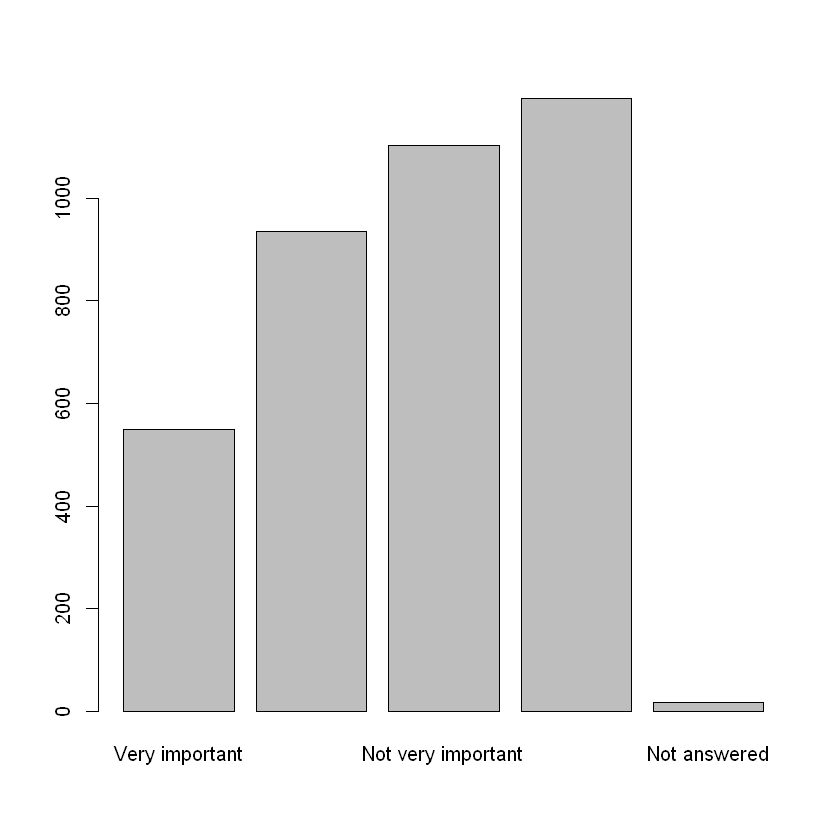

In [12]:
barplot(table(natsal$religimp))

We observe that most people consider religion not very or not important to them. An interesting extension of this analysis would be to ask: does this pattern (or distribution) change if we consider the age of the respondents? For example, would the frequency table or bar chart look different if we only consider 16-24 year olds?

We can do this by producing a frequency table of two variables simultaneously, known as a **crosstabulation** or **contingency table**:

In [13]:
table(natsal$religimp, natsal$agrp)

                      
                       16-24 25-34 35-44 45-54 55-64 65-74
  Very important          95   155    73    79    76    72
  Fairly important       185   224   118   134   117   157
  Not very important     314   298   155   134   115    86
  Not important at all   364   344   186   140    94    66
  Not answered             2     6     1     4     2     3

Here is what the above command does:
* uses the `table()` command to produce a crosstabulation of two categorical variables
* specifies two variables: `religimp` and `agrp`. Note that the first variable in the command is considered the Y variable

Now let's interpret the joint distribution of religious importance and age group. Because we are interested in explaining variation in relgious importance by age group (and we know this because we listed `religimp` first in the `table()` command), we compare **across the columns** (that is, moving from the furthest left column to the furthest right).

For example, the most frequent category for the first 4 age groups is 'Not important at all', while for those 55 and older it is 'Fairly important'. This pattern is plausible as it fits with [other research](https://dspace.mic.ul.ie/handle/10395/1800) showing a decline in religiosity over time.

Thus it appears that religious importance and age are associated. However we need to be cautious when interpreting the raw numbers. For instance, 157 people aged 65-74 responded that religion is 'Fairly important', a lower number than the two youngest age groups. But what we are really interested in is whether a higher **percentage** of people aged 65-74 claim religion is 'Fairly important' - this is because there are fewer respondents in this age group and thus we would expect lower numbers in most of the `religimp` categories.

In [14]:
relig_age_table <- table(natsal$religimp, natsal$agrp) # store the results of the `table()` command in an object called 'relig_age_table'

In [15]:
round(prop.table(relig_age_table, 2)* 100, 0) # column percentages

                      
                       16-24 25-34 35-44 45-54 55-64 65-74
  Very important          10    15    14    16    19    19
  Fairly important        19    22    22    27    29    41
  Not very important      33    29    29    27    28    22
  Not important at all    38    33    35    29    23    17
  Not answered             0     1     0     1     0     1

Now we have a better sense of how the responses are distributed across categories. For example, we clearly see the decline in respondents who claim religion is 'Not very important at all' as age increases - from 38% in the youngest age group to 17% in the oldest.

**TASK**: produce a crosstabulation of `religimp` and `rsex`. What can you conclude about the joint distribution of these variables?

In [16]:
# INSERT CODE HERE

It can often be easier to interpret the joint distribution of two variables using a graph:

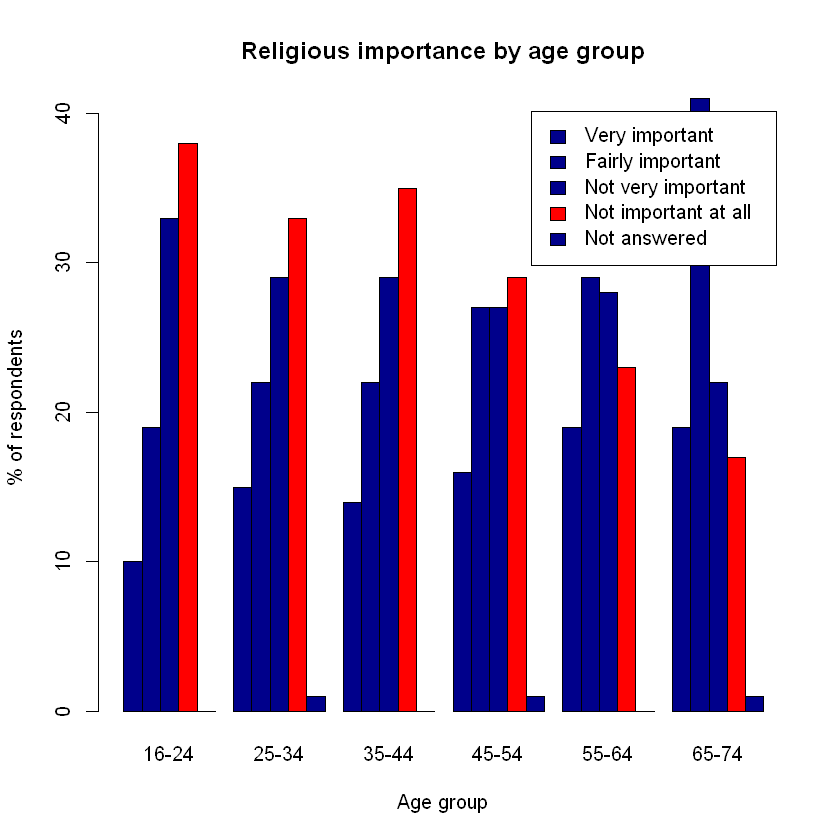

In [17]:
relig_age_perc_table <- round(prop.table(relig_age_table, 2)* 100, 0)

barplot(relig_age_perc_table, main="Religious importance by age group",
  xlab="Age group", ylab="% of respondents", col=c("darkblue", "darkblue", "darkblue", "red", "darkblue"),
  legend = rownames(relig_age_perc_table), beside=TRUE)

In the example above we decided to just highlight the 'Not important at all' category (using the colour red), as this clearly shows the increase in religious importance as people age.

**TASK**: produce a bar chart of `religimp` and `rsex`.

In [18]:
# INSERT CODE HERE

##### Measures of association

Crosstabulations and bar charts are an excellent means of getting a sense of whether an association exists, and its nature. However we would also like to know how **strong** the association is and in which **direction** it runs. For instance:
* the observed decline in respondents who claim religion is 'Not very important at all' as age increases - from 38% in the youngest age group to 17% in the oldest.

Is this evidence of a weak, moderate or strong association? Should we not expect religious importance to vary across age groups anyway, just due to random variation? And is there a consistent descrease in the percent responding 'Not very important at all' as age increases i.e., the percentage gets smaller from one age group to the next.

Therefore it would be good to have a single number that summarises the strength and/or the direction of the association. We call this number a **measure of association**.

In order to select an appropriate measure of association, we once again consider the level of measurement of our variables:
* `religimp` is an ordinal variable
* `agrp` is an ordinal variable

In this instance we can select from two options:
1. *Kendall's tau-B* - we use this when we have the same number of categories in each variable (or same number of rows and columns in a crosstabulation)
2. *Goodman and Kruskal's gamma* - we use this when we have a different number of categories in each variable (or different number of rows and columns in a crosstabulation)

* Both measures produce coefficients that range from -1 to 1.
* Negative coefficients represent negative associations (e.g., one variable increases, other decreases and vice versa) and positive coefficients represent positive associations (e.g., one variable increases, the other increases and vice versa). The 
* The strength of the association is greater as the coefficient approaches either -1 or 1. 
* A value close to zero indicates the absence of an association.

As both variables do not have the same number of categories, we should not use *Kendall's tau-B*. Instead we will calculate *Goodman and Kruskal's gamma*:

In [19]:
library(DescTools) # import the package containing the `GoodmanKruskalGamma()` command

In [20]:
GoodmanKruskalGamma(natsal$religimp, natsal$agrp)

[1] -0.1696008

How do we interpret this coefficient? We start by looking at the **sign**: it is negative (note the minus symbol), indicating that there is a negative association between religious importance and age. That is, as the value of one variable increases, the value of the other decreases. This is easier to understand when you look at how the categories of each variable are numbered:
* for `agrp` the '16-24' category is given the value '1', '25-34' the value '2' and so on
* for `religimp` the 'Very important' category is given the value '1', 'Fairly important' the value '2' and so on

Therefore the association coefficient tells us that as the value of `agrp` increases, the value of `religimp` decreases. Which substantively means that as people get older they are more likely to say religion is important to them.

We can understand how much more likely by looking at the **magnitude** of the coefficient: .17 (rounded to two decimal places). Recall that *Goodman and Kruskal's gamma* coefficient ranges from -1 to 1. Therefore the coefficient is quite close to zero and thus evidence of a weak association.

In summary, how would we characterise the association between religious importance and age? We would say there is a weak, negative association: older people are more likely to say religion is important to them but the differences with other ages are not large.

Even though it is not considered appropriate in this instance, let's see whether the coefficient for *Kendall's tau-B* is similar:

In [21]:
cor.test(as.numeric(natsal$religimp), as.numeric(natsal$agrp), method="kendall") # Kendall's tau-B


	Kendall's rank correlation tau

data:  as.numeric(natsal$religimp) and as.numeric(natsal$agrp)
z = -9.8999, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1310461 


#### Nominal vs Nominal and Nominal vs Ordinal

What if we have at least one nominal variable in our bivariate analysis? Given that this type of variable does not have an inherent order (e.g., sex at birth, ethnicity), it does not make sense to speak about the direction of the association (i.e., positive or negative). Therefore we need a different measure of association: 
* *Cramer's V*

*Cramer's V* is bounded between 0 and 1, and tells us the strength of the association when there is at least one nominal variable.

Let's look at an example: is a respondent's sex at birth related to how important religion is to them.

In [22]:
relig_sex_table <- table(natsal$religimp, natsal$rsex) # store the results of the `table()` command in an object called 'relig_age_table'
round(prop.table(relig_sex_table, 2)* 100, 0) # column percentages

                      
                       Male Female
  Very important         12     16
  Fairly important       22     26
  Not very important     28     29
  Not important at all   37     28
  Not answered            1      0

It appears that women are slightly more likely to say religion is at least fairly important to them. Let's summarise this pattern using *Cramer's V*:

In [23]:
CramerV(natsal$religimp, natsal$rsex)

[1] 0.1105517

**QUESTION**: how would you describe the strength of the association between sex at birth and religious importance?

### Categorical vs Numeric

How do we approach bivariate analysis when we have one categorical and one numeric variable? The key task is to summarise the numeric variable for different categories of our categorical variable. That is, we want to see if measures of central tendency (e.g., mean, median) and dispersion (e.g., standard deviation, minimum, maximum) vary across categories of a chosen variable.

#### Joint distribution

We can use a **table of means** to see how the average of a numeric variable varies across categories of a categorical variable. For instance, let's examine whether sexual attitudes are more or less conservative (`attconservative`) across different age groups (`agrp`) and sexes (`rsex`).

Firstly, let's summarise our numeric variable:

In [24]:
summary(natsal$attconservative)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-3.88938 -0.67900 -0.02177 -0.01728  0.71396  2.59516      299 

In [25]:
sd(natsal$attconservative, na.rm=TRUE)

[1] 1.00745

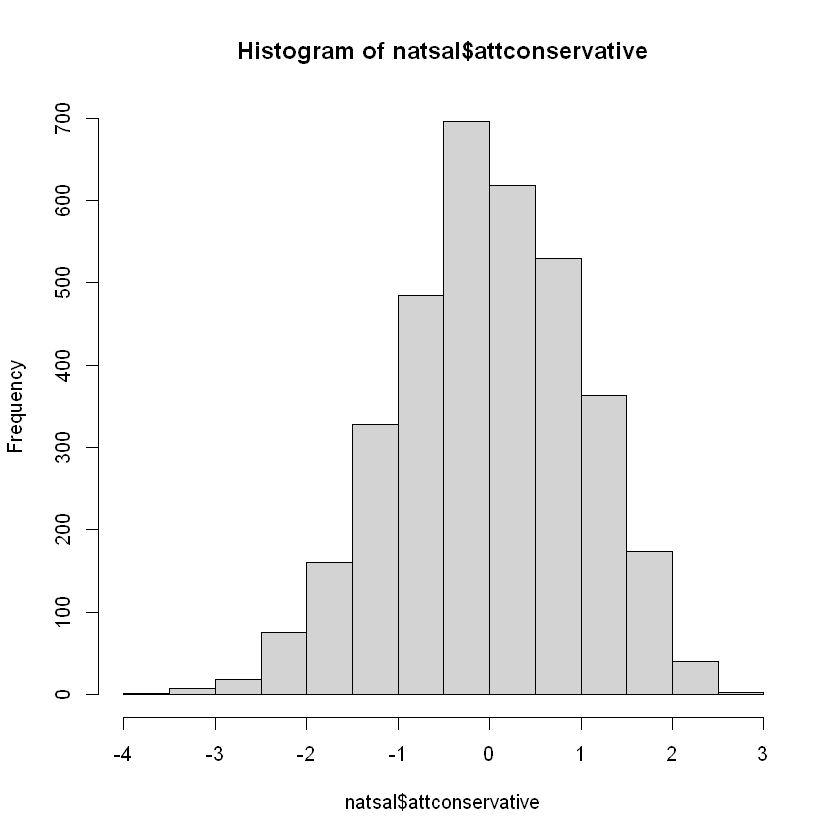

In [26]:
hist(natsal$attconservative)

We see that the average attitude is slightly liberal (less than zero) and that most people are within 1 point of this average.

Now we want to examine whether the average attitude varies by age group.

In [27]:
aggregate(attconservative ~ agrp, data = natsal, mean)

agrp,attconservative
<fct>,<dbl>
16-24,-0.14817995
25-34,-0.12178847
35-44,-0.15752222
45-54,0.03590071
55-64,0.20013488
65-74,0.51733262


In [28]:
aggregate(attconservative ~ agrp, data = natsal, median)

agrp,attconservative
<fct>,<dbl>
16-24,-0.11479968
25-34,-0.12259808
35-44,-0.14095068
45-54,0.07900358
55-64,0.27863634
65-74,0.55635821


Perhaps predictably, older respondents are more likely to hold conservative attitudes to sex than younger people, regardless of whether we use the mean or median as our measure of central tendency.

We can employ the same technique - using a summary table - to examine whether attitudes to sex are **more variable** within certain age groups. That is, does the standard deviation vary across categories of age? Recall that the standard deviation is a measure of dispersion and tells us whether the mean is a good representation of the values of a variable.

In [29]:
aggregate(attconservative ~ agrp, data = natsal, sd)

agrp,attconservative
<fct>,<dbl>
16-24,0.9384610
25-34,1.0393459
35-44,0.9850891
45-54,1.0203073
55-64,0.9530847
65-74,0.9447077


The standard deviation does not vary much across age groups.

We could also look at the minimum and maximum values across age groups:

In [30]:
aggregate(attconservative ~ agrp, data = natsal, min)

agrp,attconservative
<fct>,<dbl>
16-24,-2.591207
25-34,-3.116903
35-44,-3.116903
45-54,-3.889383
55-64,-3.048672
65-74,-2.499142


In [31]:
aggregate(attconservative ~ agrp, data = natsal, max)

agrp,attconservative
<fct>,<dbl>
16-24,2.385838
25-34,2.595157
35-44,2.347007
45-54,2.595157
55-64,2.347007
65-74,2.226923


Curiously, the most liberal attitude is from a respondent in the 65-74 age group, while the most conservative attitude belongs to respondents in the 25-34 and 45-54 categories.

Therefore while older people hold more conservative attitudes to sex on average, each age group contains a range of liberal and conservative respondents. This can seen more clearly using a graph known as a **boxplot**:

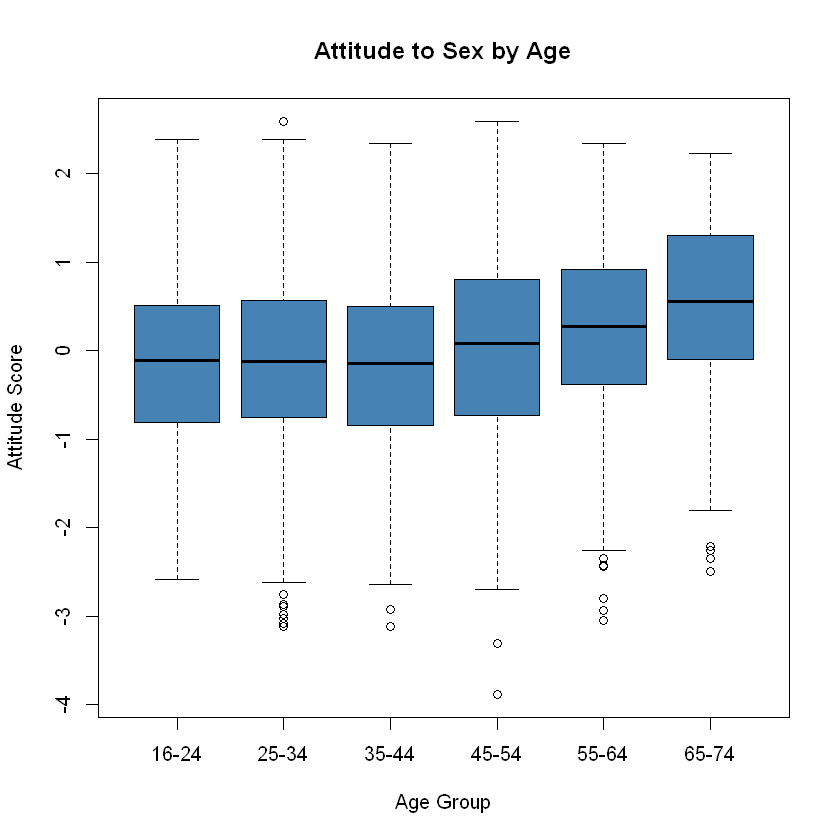

In [32]:
boxplot(attconservative ~ agrp,
data = natsal,
main = "Attitude to Sex by Age",
xlab = "Age Group",
ylab = "Attitude Score",
col = "steelblue",
border = "black")

Learn more about boxplots and how to interpret them: [Reading box plots](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/reading-box-and-whisker-plots)

**TASK:** Produce some tables of summary statistics and a boxplot for the association between attitudes to sex (`attconservative`) and sex at birth (`rsex`).

#### Measures of association

The appropriate measure of association when you have one categorical and one numeric variable is:
* *Eta squared*

This tells us the strength of the association but not the direction (we need to infer this from the summary tables above). *Eta squared* coefficient ranges from 0 to 1, with higher values representing stronger associations.

In [33]:
library(lsr) # import the package containing the `etaSquared()` command

In [34]:
model <- aov(attconservative ~ agrp, data = natsal)
etaSquared(model)

,eta.sq,eta.sq.part
agrp,0.04232259,0.04232259


The low value for the *Eta squared* coefficient implies that there is a weak to non-existent association between attitudes to sex and age, despite the pattern observed in the table of means. This makes sense, as the variation in average attitude across age groups is very small and really only noticeable when we compare the youngest and oldest age groups: for example, there is little variation between the three youngest age groups.

### Numeric vs Numeric

Finally, we consider associations between two numeric variables, often known as **correlation** analysis. 

For this section we are going to return to our dataset with median ages of countries around the world and pose the question:
* *Is the median age increasing over time?*

In [35]:
country_ages <- read.csv("./data/median-age-our-world-in-data.csv", header=TRUE, na="NA")
head(country_ages)

,Entity,Code,Year,Age
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1950,19.4
2,Afghanistan,AFG,1955,19.2
3,Afghanistan,AFG,1960,18.8
4,Afghanistan,AFG,1965,18.4
5,Afghanistan,AFG,1970,17.9
6,Afghanistan,AFG,1975,17.4


#### Joint distribution

It is difficult to use tables to examine the distributions of numeric variables: there are often two many values to display. For example, here is a table of median age, showing how many times each value occurs:

In [36]:
table(country_ages$Age)


     14.3      14.5      14.7      14.8      14.9        15      15.1      15.2 
        1         1         2         3         3         5         4         8 
     15.3      15.4      15.5      15.6      15.7      15.8      15.9        16 
        7         7         9        13         9        14        11        19 
     16.1 16.200001 16.299999      16.4      16.5      16.6 16.700001 16.799999 
       19        15        27        23        20        27        27        42 
     16.9        17      17.1 17.200001 17.299999      17.4      17.5      17.6 
       24        39        34        40        30        40        50        43 
17.700001 17.799999      17.9        18      18.1 18.200001 18.299999      18.4 
       47        56        39        47        42        43        38        39 
     18.5      18.6 18.700001 18.799999      18.9        19      19.1 19.200001 
       45        51        42        43        47        41        52        45 
19.299999      19.4      19

Not very useful is it. Therefore we are best off using graphical approaches, such as **histograms** and **boxplots**:

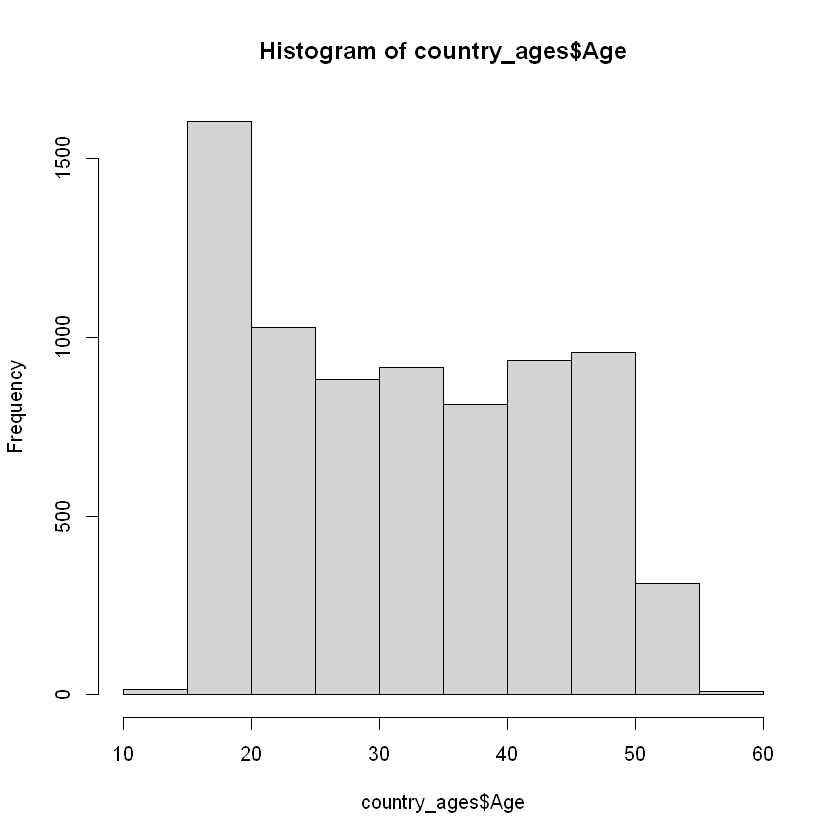

In [37]:
hist(country_ages$Age)

While it is possible to display two histograms on the same graph, a better way of displaying the joint distribution of two numeric variables is to use a **scatterplot**:

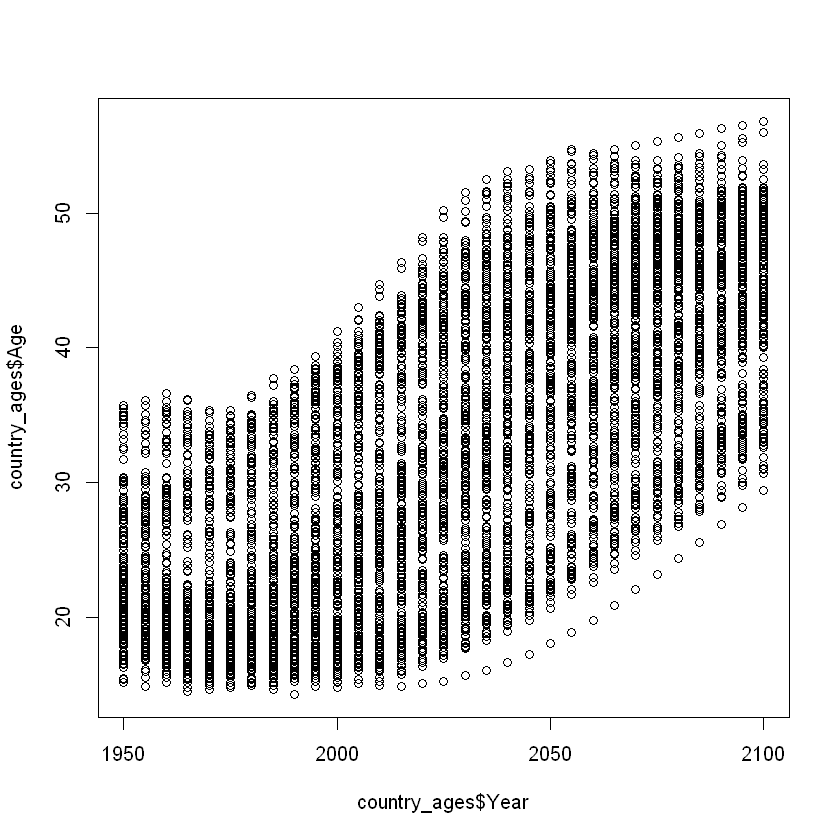

In [38]:
plot(country_ages$Year, country_ages$Age) # X variable (axis) is listed first, Y variable (axis) second

There is a lot of variability within a given year but there does seem to be a clear temporal trend: median age has increased since 1950 and is projected to continue doing so until 2100.

#### Measure of association

We will use the following measure of association:
* *Pearson's correlation coefficient (r)*

Similar to other measures of association, it tells us the strength and direction of the association between two variables. The coefficient ranges between -1 and 1, with negative values representing negative associations, and positive values positive associations. Values closer to -1 or 1 indicate stronger associations than those closer to 0.

In [39]:
cor(country_ages$Year, country_ages$Age, use = "complete.obs")

[1] 0.7324142

No surprise there: the correlation coefficient indicates a strong, positive association between time and median age.

To add some nuance, let's only include years that have already occurred:

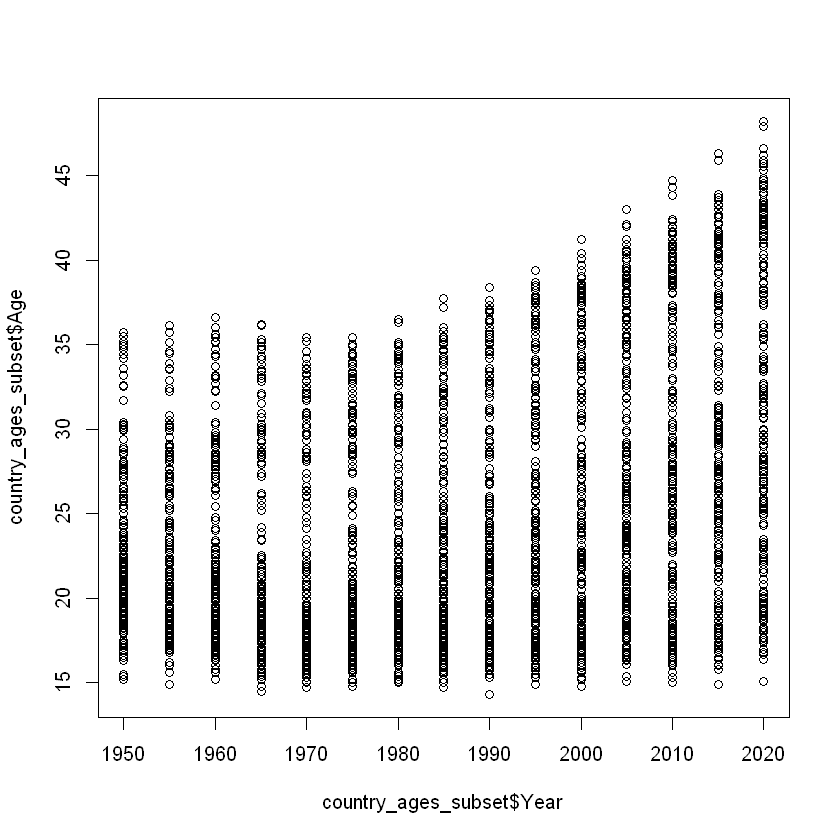

In [40]:
country_ages_subset <- subset(country_ages, Year < 2021)
plot(country_ages_subset$Year, country_ages_subset$Age) 

In [41]:
cor(country_ages_subset$Year, country_ages_subset$Age, use = "complete.obs")

[1] 0.3721477

**QUESTION:** Is the association between year and median age weaker or stronger when we exclude observations for future years?

## Conclusion

In this lesson we encountered a range of techniques for summarising more than one variable at a time, in particular focusing on whether two variables are related.

In this next lesson we focus on summarising the joint distribution of two variables, this time across values of a third variable, a technique known as *multivariate* analysis. We also look at how we can produce statistics that help us make claims about the *generalisability* of our results.